In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("IMDb Movies India.csv", encoding='latin1')


In [12]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [14]:
df.shape

(15509, 10)

In [25]:
# Clean and preprocess the dataset
# Drop rows with missing values in specific columns
df_cleaned = df.dropna(subset=['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director'])

# Convert 'Year' column to numeric and extract only the year
df_cleaned['Year'] = df_cleaned['Year'].str.extract('(\d+)').astype(float)

# Convert 'Duration' column to numeric (remove 'min' suffix)
df_cleaned['Duration'] = df_cleaned['Duration'].str.replace(' min', '').astype(float)

# Handle missing values in 'Rating' column (fill with mean)
mean_rating = df_cleaned['Rating'].mean()
df_cleaned['Rating'].fillna(mean_rating, inplace=True)

# Clean 'Votes' column: remove commas and convert to float
df_cleaned['Votes'] = df_cleaned['Votes'].str.replace(',', '').astype(float)



# Convert categorical variables (Genre) into dummy/indicator variables
df_cleaned = pd.get_dummies(df_cleaned, columns=['Genre'])

# Display the cleaned dataset
print("Cleaned Dataset shape:", df_cleaned.shape)
print(df_cleaned.head())


Cleaned Dataset shape: (5819, 402)
                                 Name    Year  Duration  Rating   Votes  \
1  #Gadhvi (He thought he was Gandhi)  2019.0     109.0     7.0     8.0   
3                             #Yaaram  2019.0     110.0     4.4    35.0   
5                ...Aur Pyaar Ho Gaya  1997.0     147.0     4.7   827.0   
6                           ...Yahaan  2005.0     142.0     7.4  1086.0   
8                  ?: A Question Mark  2012.0      82.0     5.6   326.0   

         Director          Actor 1                 Actor 2          Actor 3  \
1   Gaurav Bakshi     Rasika Dugal          Vivek Ghamande    Arvind Jangid   
3      Ovais Khan          Prateik              Ishita Raj  Siddhant Kapoor   
5    Rahul Rawail       Bobby Deol  Aishwarya Rai Bachchan    Shammi Kapoor   
6  Shoojit Sircar  Jimmy Sheirgill          Minissha Lamba   Yashpal Sharma   
8   Allyson Patel        Yash Dave          Muntazir Ahmad     Kiran Bhatia   

   Genre_Action  ...  Genre_Romance, Th

/var/folders/p6/ccmlkbjj1ps3xq3khhxndlbc0000gn/T/ipykernel_34284/3092365309.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Year'] = df_cleaned['Year'].str.extract('(\d+)').astype(float)
/var/folders/p6/ccmlkbjj1ps3xq3khhxndlbc0000gn/T/ipykernel_34284/3092365309.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Duration'] = df_cleaned['Duration'].str.replace(' min', '').astype(float)
/var/folders/p6/ccmlkbjj1ps3xq3khhxndlbc0000gn/T/ipykernel_34284/3092365309.py:13: SettingWithC

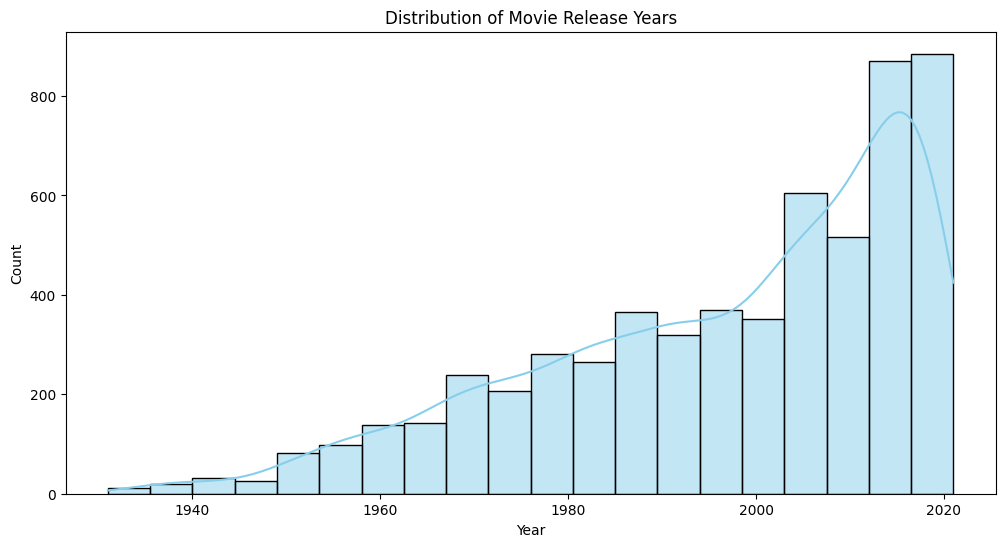

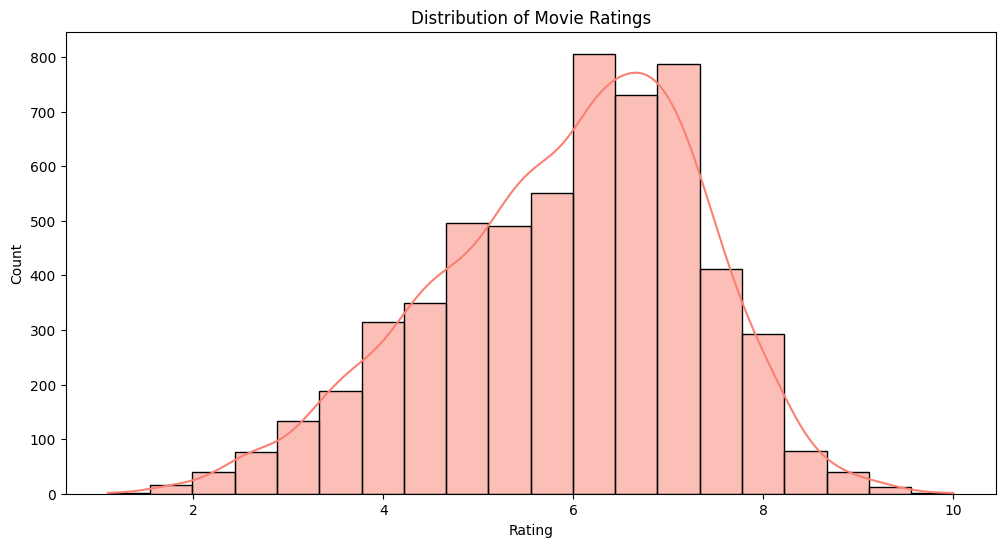

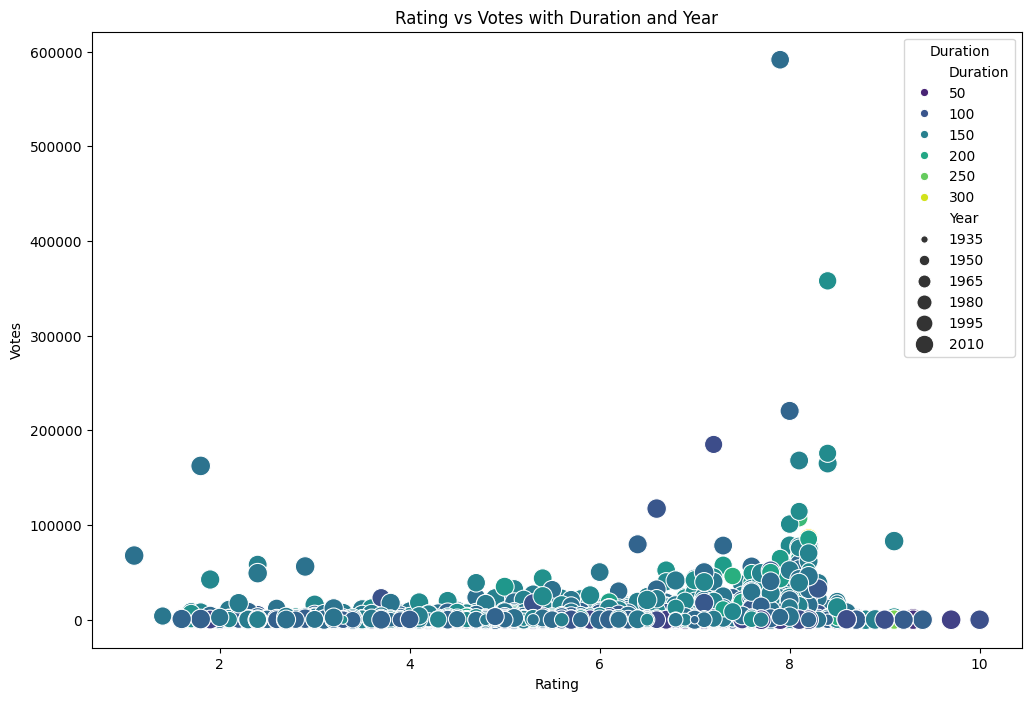

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explore distribution of numerical variables
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['Year'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Movie Release Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['Rating'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Explore relationships between variables
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Rating', y='Votes', data=df_cleaned, hue='Duration', palette='viridis', size='Year', sizes=(20, 200))
plt.title('Rating vs Votes with Duration and Year')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.legend(title='Duration')
plt.show()




In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split into features (X) and target (y)
X = df_cleaned.drop(['Name', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], axis=1)
y = df_cleaned['Rating']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 1.838027917333718e-21
R-squared Score: 1.0


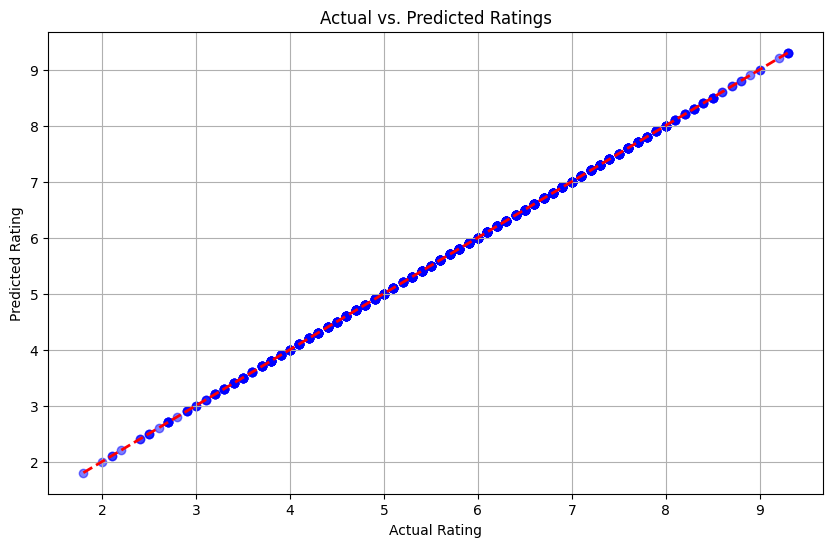

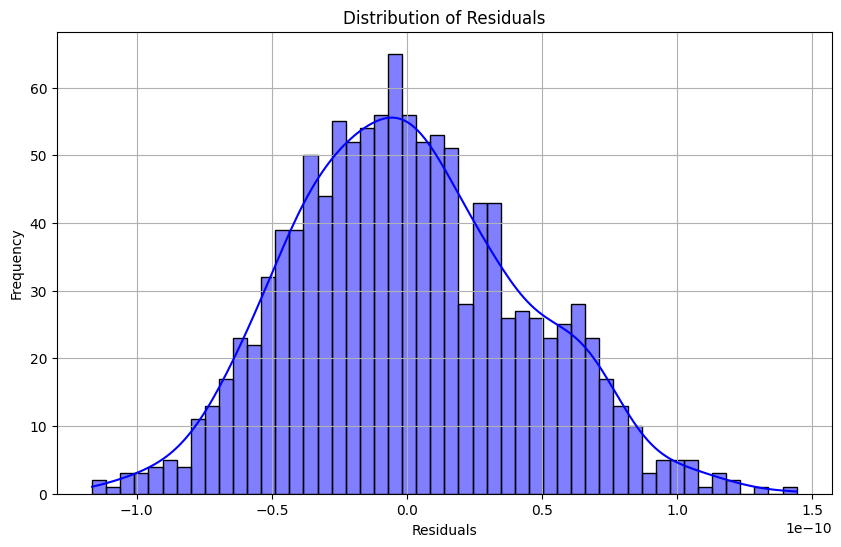

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting actual vs. predicted ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Ratings')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.grid(True)
plt.show()

# Plotting residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True, color='blue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Training Linear Regression...
Linear Regression:
Mean Squared Error: 6.806011547499559e+24
R-squared Score: -3.628845335995216e+24
Training Ridge Regression...
Ridge Regression:
Mean Squared Error: 1.620632167350435
R-squared Score: 0.1359075075307421
Training Lasso Regression...
Lasso Regression:
Mean Squared Error: 1.6891389617083907
R-squared Score: 0.09938089286738849
Training Random Forest Regressor...
Random Forest Regressor:
Mean Squared Error: 1.229591480181815
R-squared Score: 0.3444035060921231


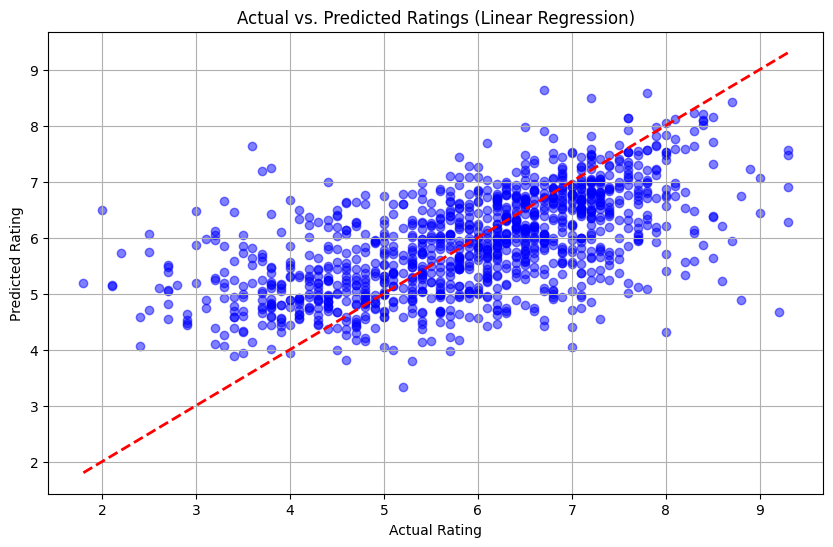

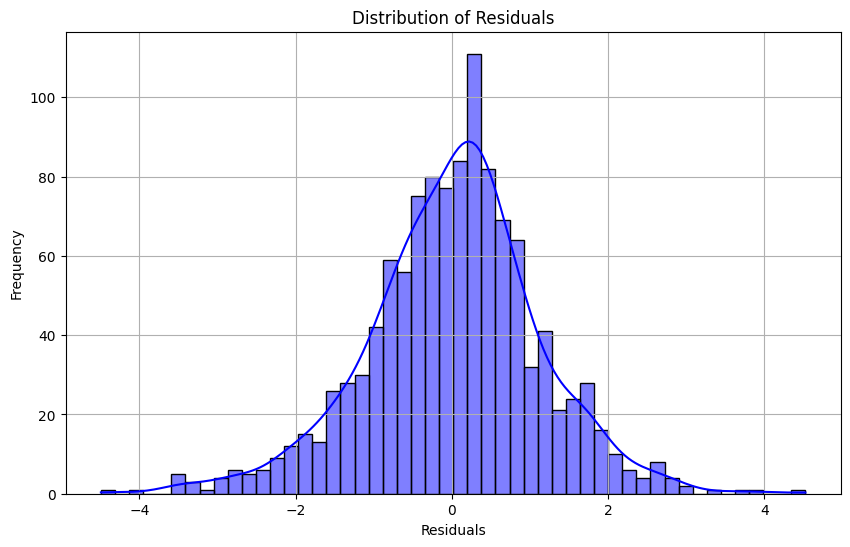

In [45]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler



# Split into features (X) and target (y)
X = df_cleaned.drop(['Name', 'Director', 'Actor 1', 'Actor 2', 'Actor 3','Rating'], axis=1)
y = df_cleaned['Rating']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate multiple regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=0.1),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42)
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name}:")
    print("Mean Squared Error:", mse)
    print("R-squared Score:", r2)
    print("="*40)

# Additional Visualizations (Optional)
import matplotlib.pyplot as plt

# Plotting actual vs. predicted ratings for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Ratings (Linear Regression)')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.grid(True)
plt.show()

# Plotting residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True, color='blue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()